# FLIP ROBO TECHNOLOGIES


# NAME: BIJAY PAREEK


# BATCH NO: DS2308


# Projects Evaluation Phase 3


# Insurance Claim Fraud Detection

## Project Description

Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 
In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

## Independent Variables

1.	months_as_customer: Number of months of patronage

2.	age: the length of time a customer has lived or a thing has existed

3.	policy_number: It is a unique id given to the customer, to track the subscription status and other details of customer

4.	policy_bind_date:date which document that is given to customer after we accept your proposal for insurance

5.	policy_state: This identifies who is the insured, what risks or property are covered, the policy limits, and the policy period

6.	policy_csl: is basically Combined Single Limit

7.	policy_deductable: the amount of money that a customer is responsible for paying toward an insured loss

8.	policy_annual_premium: This means the amount of Regular Premium payable by the Policyholder in a Policy Year

9.	umbrella_limit: This means extra insurance that provides protection beyond existing limits and coverages of other policies

10.	insured_zip: It is the zip code where the insurance was made

11.	insured_sex: This refres to either of the two main categories (male and female) into which customer are divided on the basis of their reproductive functions

12.	insured_education_level: This refers to the Level of education of the customer

13.	insured_occupation: This refers Occupation of the customer

14.	insured_hobbies: This refers to an activity done regularly by customer in his/her leisure time for pleasure.

15.	insured_relationship: This whether customer is: single; or. married; or. in a de facto relationship (that is, living together but not married); or. in a civil partnership

16.	capital-gains: This refers to profit accrued due to insurance premium

17.	capital-loss: This refers to the losses incurred due to insurance claims

18.	incident_date: This refers to the date which claims where made by customers

19.	incident_type: This refers to the type of claim/vehicle damage made by customer

20.	collision_type: This refers to the area of damage on the vehicle

21.	incident_severity: This refers to the extent/level of damage

22.	authorities_contacted: This refers to the government agencies that were contacted after damage

23.	incident_state: This refers to the state at which the accident happened

24.	incident_city: This refers to the city at which the accident happened

25.	1ncident_location: This refers to the location at which the accident happened

26.	incident_hour_of_the_day: The period of the day which accident took place

27.	number_of_vehicles_involved: This refers to number of vehicles involved the accident

28.	property_damage: This refers to whether property was damaged or not

29.	bodily_injuries: This refers to injuries sustained

30.	witnesses: This refers to the number of witnesses involved

31.	police_report_available: This refers to whether the report on damage was documented or not

32.	total_claim_amount: This refers to the financial implications involved in claims

33.	injury_claim: This refers to physical injuries sustained

34.	property_claim: This refers to property damages during incident

35.	vehicle_claim: This refers to property damages during incident

36.	auto_make: This refers to the make of the vehicle

37.	auto_model: This refers to the model of the vehicle

38.	auto_year: This refers to the year which the vehicle was manufactured

39.	_c39:

40.	fraud_reported

Dataset Link-  
•	https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/Automobile_insurance_fraud.csv


# Import necessary libraries:

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import power_transform
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_roc_curve,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV

In [3]:
! pip install -U imbalanced-learn

# Loading the Dataset from the csv and excel file:

In [4]:
df = pd.read_csv(r'C:/Users/raj/Downloads/Automobile_insurance_fraud.csv')
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [5]:
print("Here we will see the first few record from the main dataset-----")
df.head()

Here we will see the first few record from the main dataset-----


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [6]:
print("Here we see the last few record from the main dataset")
df.tail()

Here we see the last few record from the main dataset


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN
999,456,60,556080,11-11-1996,OH,250/500,1000,766.19,0,612260,...,?,5060,460,920,3680,Mercedes,E400,2007,N,NaN


In [7]:
print("Here we will see the totals columns name = ",df.columns)

Here we will see the totals columns name =  Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')


In [8]:
print('Here we will see the total rows and column = ',df.shape)

Here we will see the total rows and column =  (1000, 40)


In [9]:
print("Here we will see the datatypes of each columns = ")
df.dtypes

Here we will see the datatypes of each columns = 


months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [10]:
print("Here we will see all the object columns-------")
df.select_dtypes(include='object').nunique()

Here we will see all the object columns-------


policy_bind_date            951
policy_state                  3
policy_csl                    3
insured_sex                   2
insured_education_level       7
insured_occupation           14
insured_hobbies              20
insured_relationship          6
incident_date                60
incident_type                 4
collision_type                4
incident_severity             4
authorities_contacted         5
incident_state                7
incident_city                 7
incident_location          1000
property_damage               3
police_report_available       3
auto_make                    14
auto_model                   39
fraud_reported                2
dtype: int64

# Now we will see the nan in the dataset:

In [11]:
print("Here we will see the missing value present  in the dataset------------- ")
df.isnull().sum()

Here we will see the missing value present  in the dataset------------- 


months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

###  Note: Thus there is no missing value present in the dataset so we can go further:

In [12]:
print("Here we will see the duplicate columns present in the dataset---------")
df.duplicated().sum()

Here we will see the duplicate columns present in the dataset---------


0

# Note Here we will see the value count of the follwing columns which include: _c39, policy_number, insured_zip:

In [13]:
df['_c39'].value_counts()

Series([], Name: _c39, dtype: int64)

In [14]:
df['policy_number'].value_counts()

521585    1
687755    1
674485    1
223404    1
991480    1
         ..
563878    1
620855    1
583169    1
337677    1
556080    1
Name: policy_number, Length: 1000, dtype: int64

In [15]:
df['insured_zip'].value_counts

<bound method IndexOpsMixin.value_counts of 0      466132
1      468176
2      430632
3      608117
4      610706
        ...  
995    431289
996    608177
997    442797
998    441714
999    612260
Name: insured_zip, Length: 1000, dtype: int64>

## Note:  i will drop  the unwanted columns (_c39, insured_zip, policy_number) from the main dataset :

### We can drop the column '_c39'and 'policy_number' as it is provided only for identification purpose of the insurance policy and '-c39' has no value in it.

In [16]:
df.drop(['policy_number','_c39','insured_zip'],axis=1,inplace = True)


In [17]:
df

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,17-10-2014,OH,250/500,1000,1406.91,0,MALE,MD,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,27-06-2006,IN,250/500,2000,1197.22,5000000,MALE,MD,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,06-09-2000,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,25-05-1990,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,06-06-2014,IL,500/1000,1000,1583.91,6000000,MALE,Associate,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,16-07-1991,OH,500/1000,1000,1310.80,0,FEMALE,Masters,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,05-01-2014,IL,100/300,1000,1436.79,0,FEMALE,PhD,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,17-02-2003,OH,250/500,500,1383.49,3000000,FEMALE,Masters,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,18-11-2011,IL,500/1000,2000,1356.92,5000000,MALE,Associate,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


# Thus we will check the shape  after removing the unwanted columns:

In [18]:
df.shape

(1000, 37)

## Now we will check the (?) present in the dataset:

In [19]:
df.isin(['?']).sum()

months_as_customer               0
age                              0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses                        0
police_report_availa

# thus we can see the (?) are present in the dataset which include: police_report_available , collision_type   and property_damage 

In [20]:
print('Here we will keep the columns named that has (?)  which are included as folowings = ')
i = ['police_report_available','collision_type','property_damage']
i

Here we will keep the columns named that has (?)  which are included as folowings = 


['police_report_available', 'collision_type', 'property_damage']

In [21]:
print('we will replace the (?) with the nan = ')
df[i] = df[i].replace('?',np.nan)
df[i]

we will replace the (?) with the nan = 


,police_report_available,collision_type,property_damage
0,YES,Side Collision,YES
1,NaN,NaN,NaN
2,NO,Rear Collision,NO
3,NO,Front Collision,NaN
4,NO,NaN,NO
...,...,...,...
995,NaN,Front Collision,YES
996,NaN,Rear Collision,YES
997,YES,Side Collision,NaN
998,YES,Rear Collision,NaN


# checking for the missing values in the dataset:

In [22]:
df.isnull().sum()

months_as_customer               0
age                              0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses                        0
police_report_availa

### Thus we can see the nan present in the dataset:

In [23]:
print("show all the nan--------------------")
df[i]

show all the nan--------------------


,police_report_available,collision_type,property_damage
0,YES,Side Collision,YES
1,NaN,NaN,NaN
2,NO,Rear Collision,NO
3,NO,Front Collision,NaN
4,NO,NaN,NO
...,...,...,...
995,NaN,Front Collision,YES
996,NaN,Rear Collision,YES
997,YES,Side Collision,NaN
998,YES,Rear Collision,NaN


## Now we are going to imputed the mode for all the missing value:

In [24]:
for i in ['police_report_available', 'collision_type', 'property_damage']:
    df[i].fillna(df[i].mode()[0], inplace = True)

In [25]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_cla

### Thus we removed the nan:

## Now we are going to see the describe methods to see the overview stats of the dataset:

In [26]:
df.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1136.000000,1256.406150,1.101000e+06,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,611.864673,244.167395,2.297407e+06,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,500.000000,433.330000,-1.000000e+06,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,500.000000,1089.607500,0.000000e+00,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,1000.000000,1257.200000,0.000000e+00,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,2000.000000,1415.695000,0.000000e+00,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,2000.000000,2047.590000,1.000000e+07,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [27]:
num_col = df.select_dtypes(include='int').columns
num_col

Index(['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_year'],
      dtype='object')

In [28]:
num_col.shape

(15,)

## Now we will see the num_col in the graph for better visualisation:

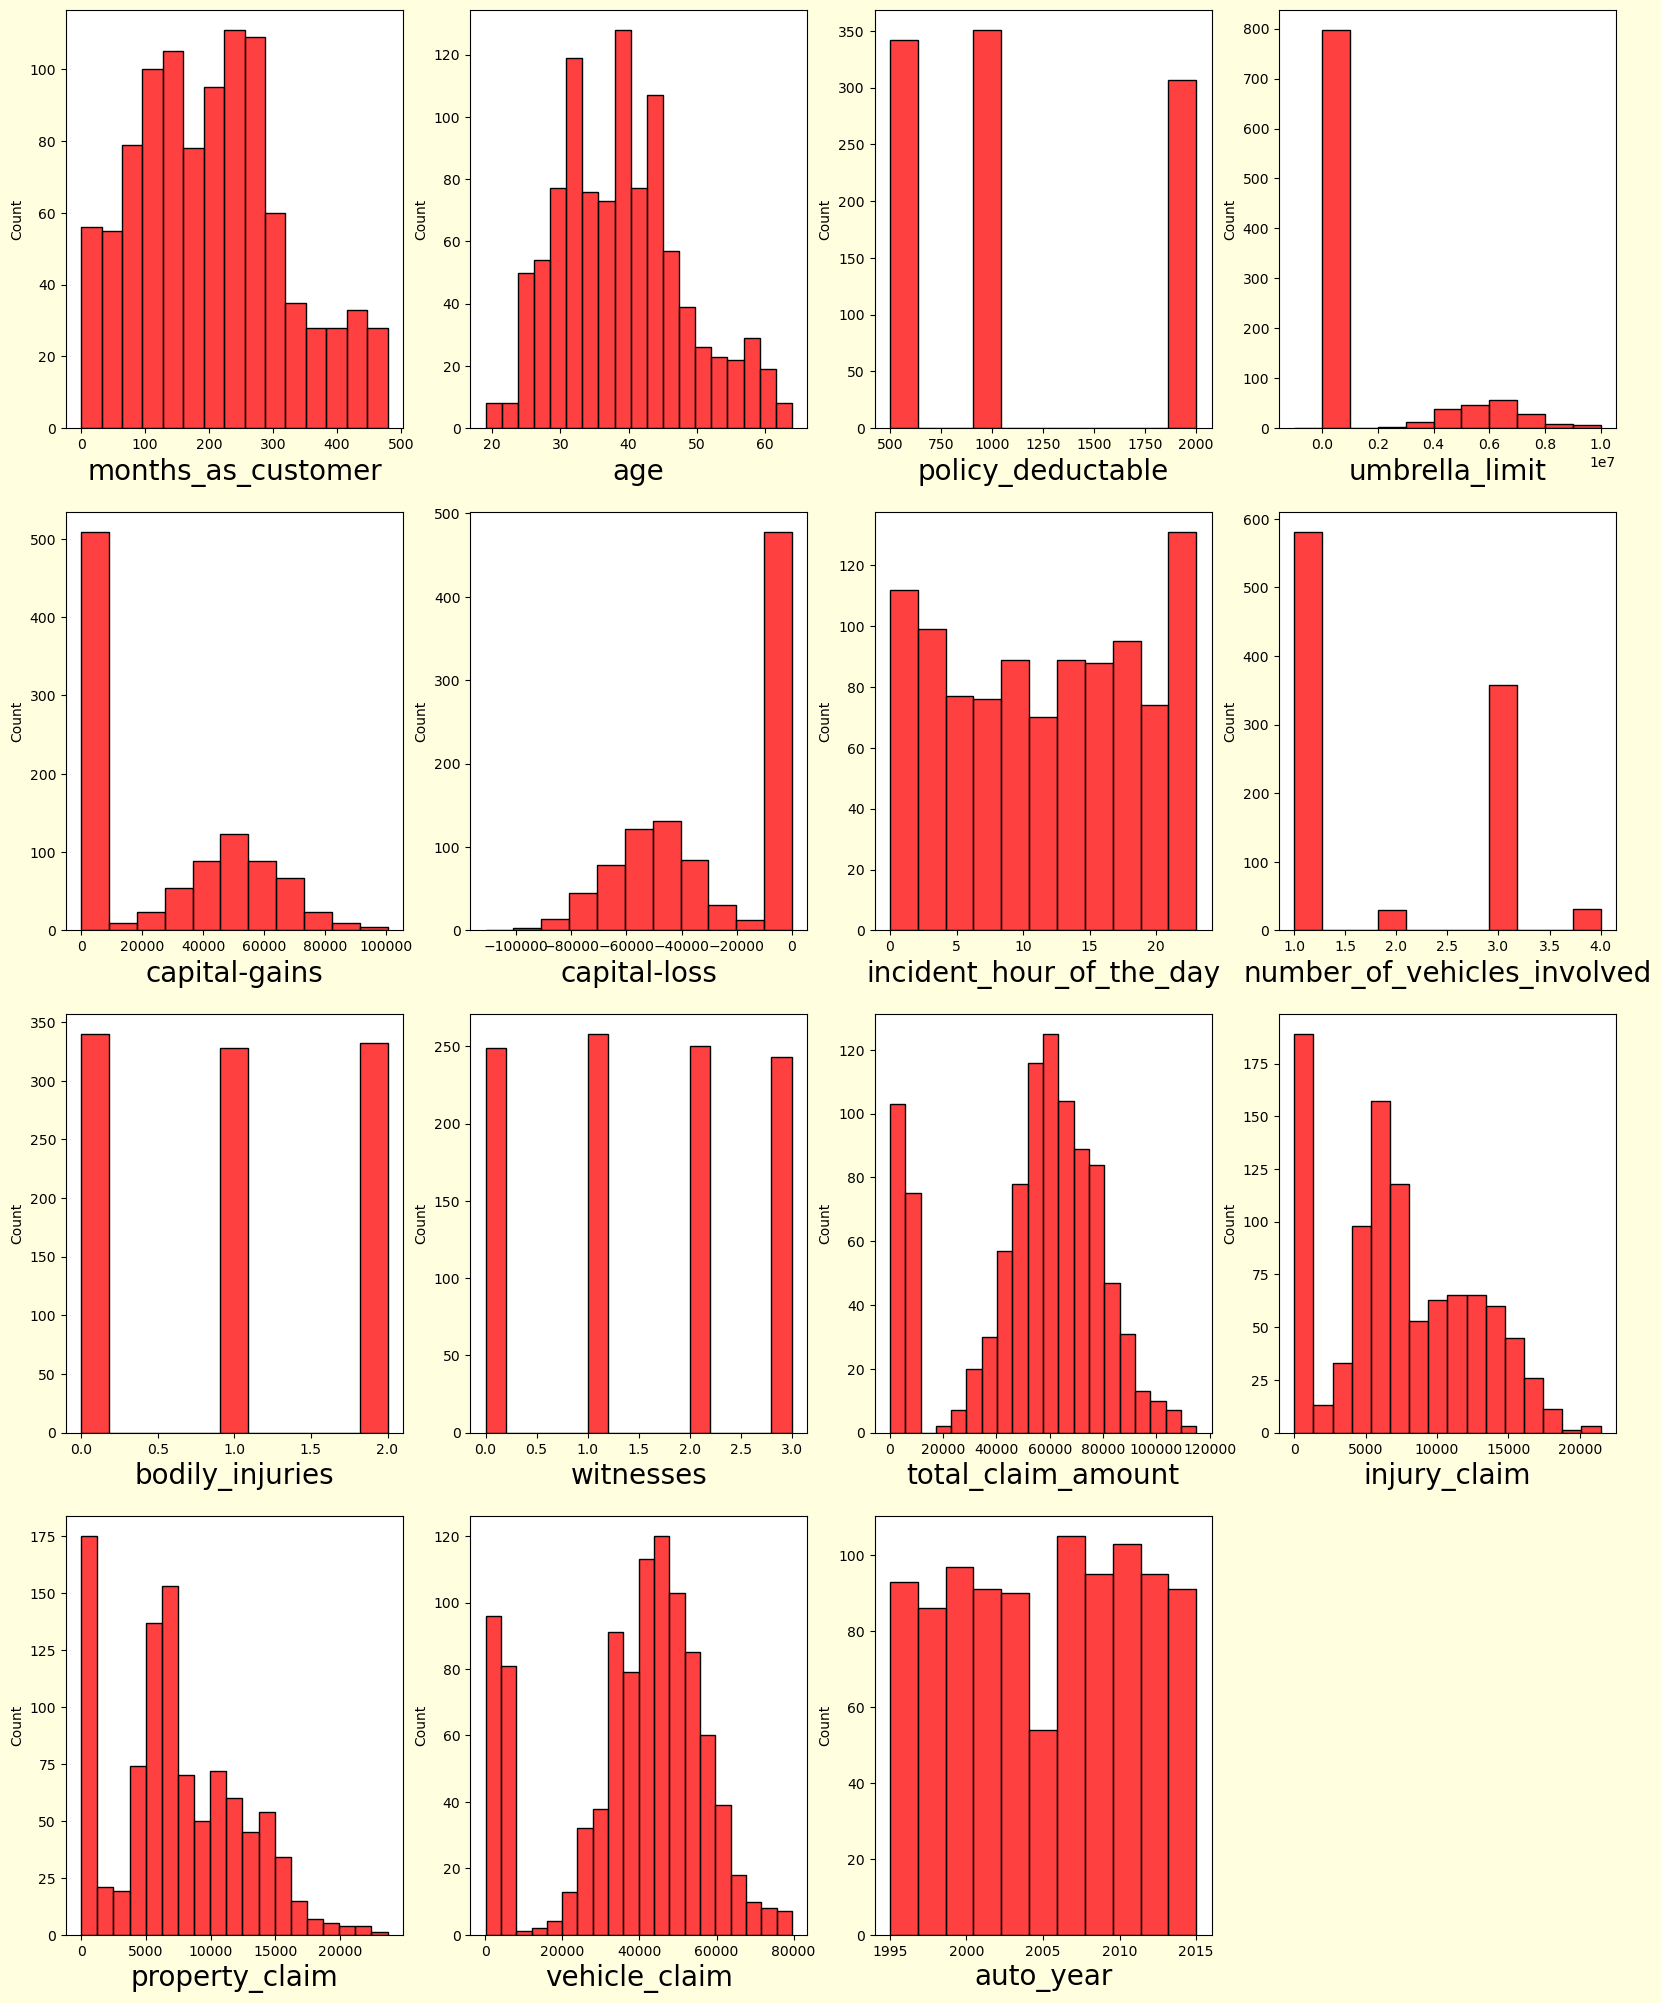

In [29]:
plt.figure(figsize=(20,25),facecolor='lightyellow')
plotnum=1
for col in num_col:
    if plotnum<=16:
        plt.subplot(4,4,plotnum)
        sns.histplot(df[col],color='red')
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

## Now we will see the barplot for the column named incident_type vs incident_hour_of_the_day:

<AxesSubplot:title={'center':'incident_type vs incident_hour_of_the_day'}, xlabel='incident_type', ylabel='incident_hour_of_the_day'>

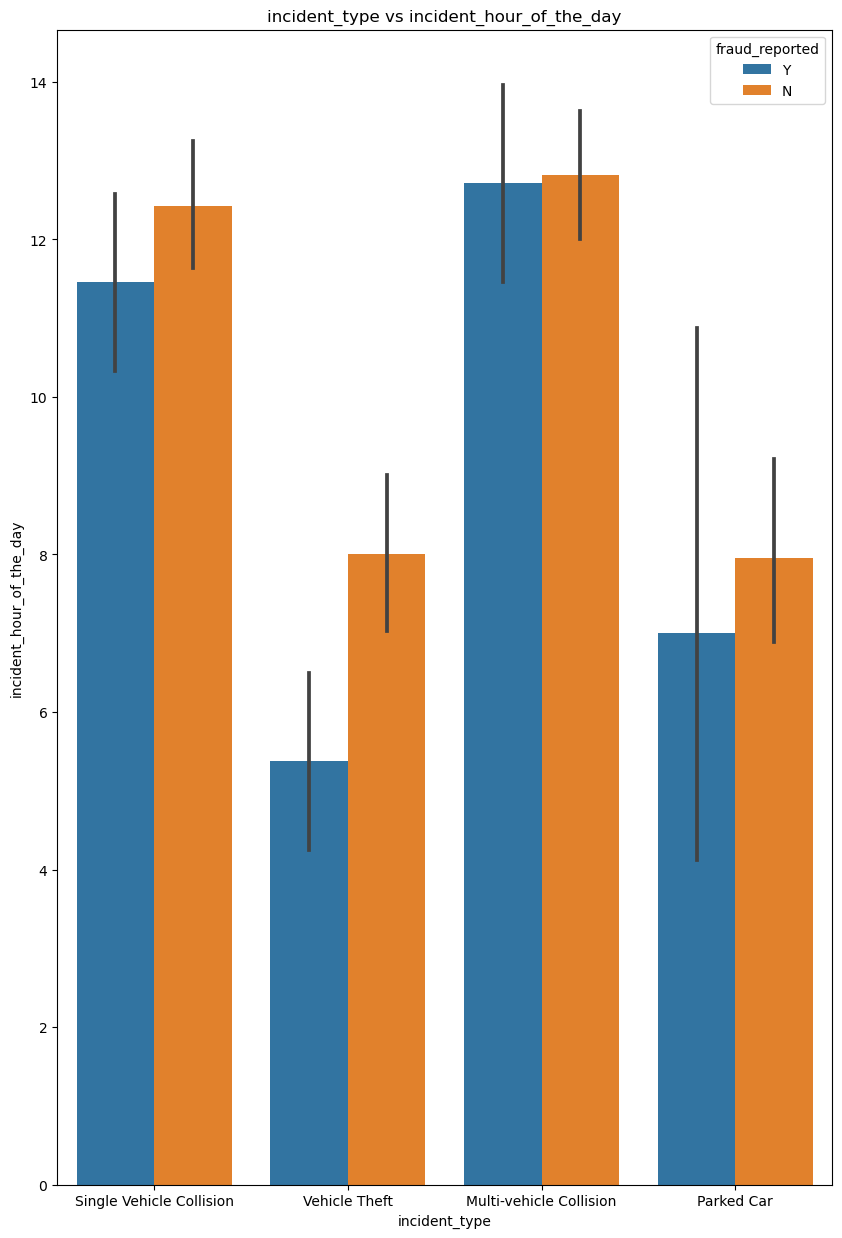

In [30]:
plt.figure(figsize = (10,15))
plt.title('incident_type vs incident_hour_of_the_day')
sns.barplot(x= 'incident_type',y = 'incident_hour_of_the_day', hue='fraud_reported',data=df)          

## Now we will see the barplot for the column named as insured_occupation vs months_as_customer:

<AxesSubplot:title={'center':'insured_occupation vs months_as_customer'}, xlabel='insured_occupation', ylabel='months_as_customer'>

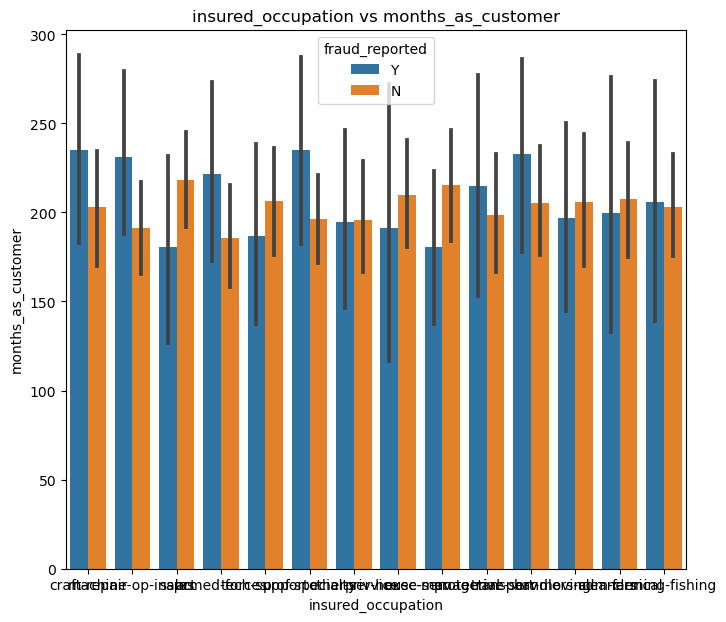

In [31]:
plt.figure(figsize=[8,7])
plt.title('insured_occupation vs months_as_customer')
sns.barplot(x='insured_occupation' , y= 'months_as_customer',data=df,hue='fraud_reported')

## Now we will see the stripplot for the column named as fraud_reported vs months_as_customer:

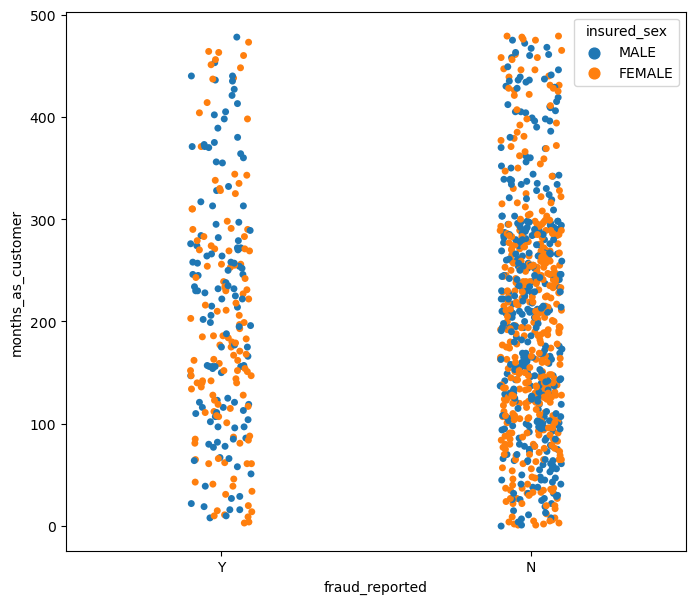

In [32]:
plt.figure(figsize = [8,7])
sns.stripplot( x ='fraud_reported', y='months_as_customer',data = df, hue = 'insured_sex')
plt.show()

## observation:
Majority not reported fraud for claim are between the age of 26 to 46

# now we will see the graph as per the reported frauds and gender:

-------------Reported frauds vs gender------------------


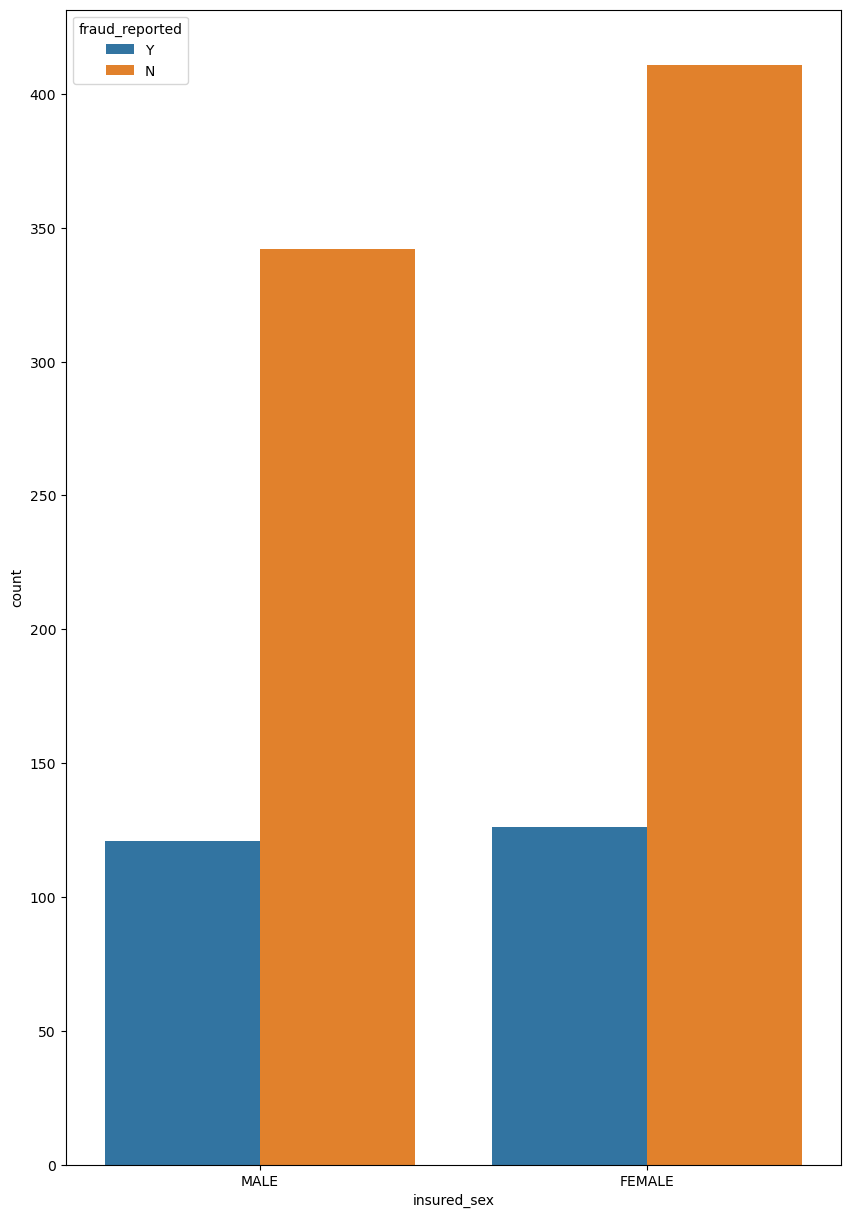

In [33]:
print('-------------Reported frauds vs gender------------------')

plt.figure(figsize=(10,15))
sns.countplot(x=df['insured_sex'],hue=df['fraud_reported'])
plt.show()

## observations------
Almost equal number of frauds were reported for both male and female

-----------------Reported fraud vs type of incident----------------------


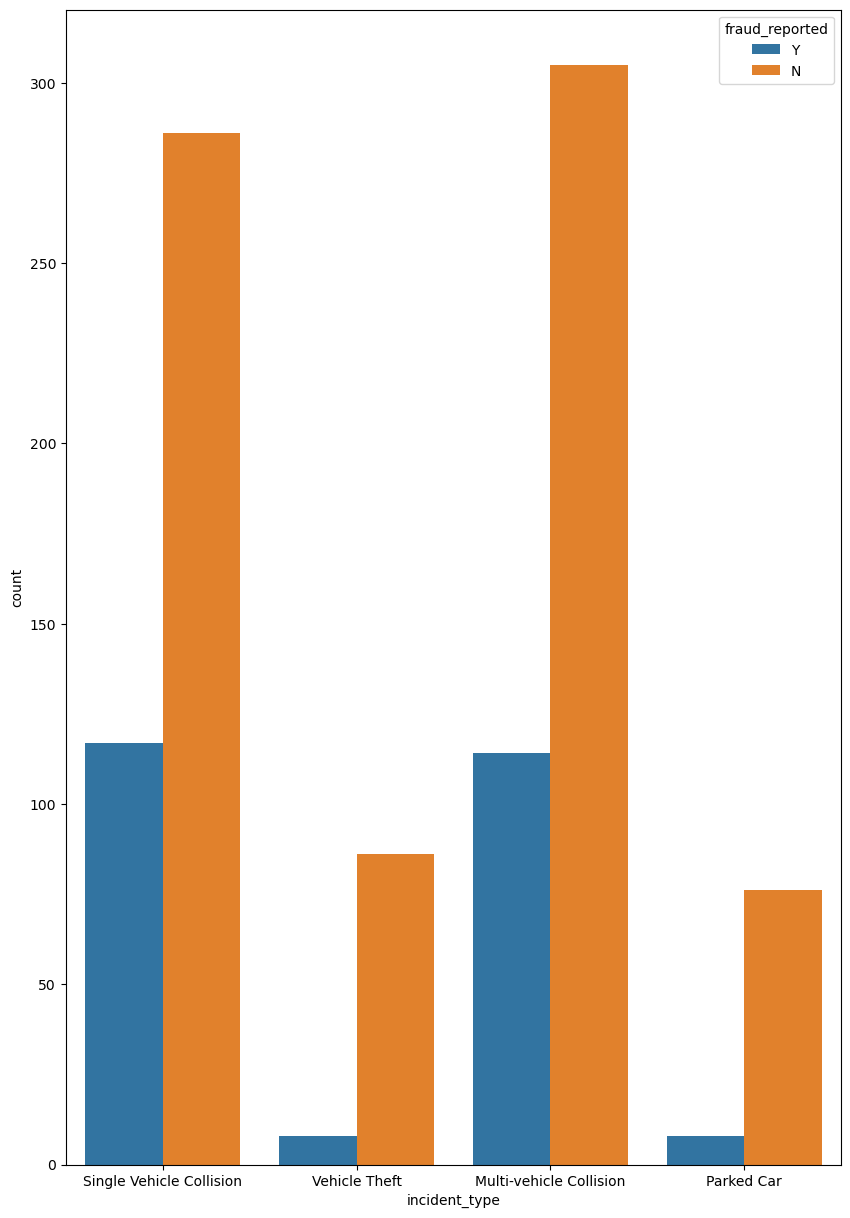

In [34]:
print('-----------------Reported fraud vs type of incident----------------------')

plt.figure(figsize=(10,15))
sns.countplot(x=df['incident_type'], hue=df['fraud_reported'])
plt.show()

## observation:
For Single and multi vehicle collision mostly frauds were reported.

................................Reported frauds vs type of collision............................


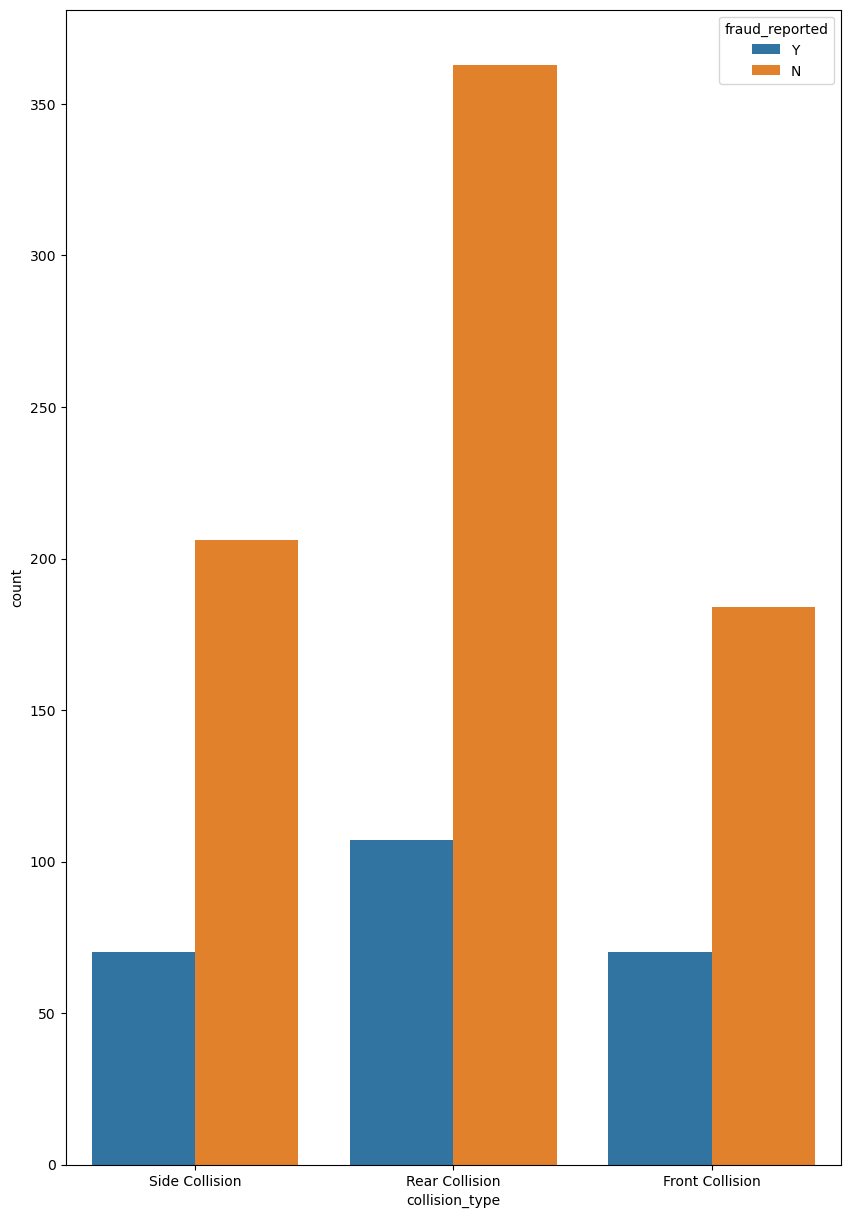

In [35]:
print('................................Reported frauds vs type of collision............................')

plt.figure(figsize=(10,15))
sns.countplot(x=df['collision_type'], hue=df['fraud_reported'])
plt.show()

## observations:
Majority frauds were reported for rear type of collision

............................Reported frauds vs Severity of incident...........................


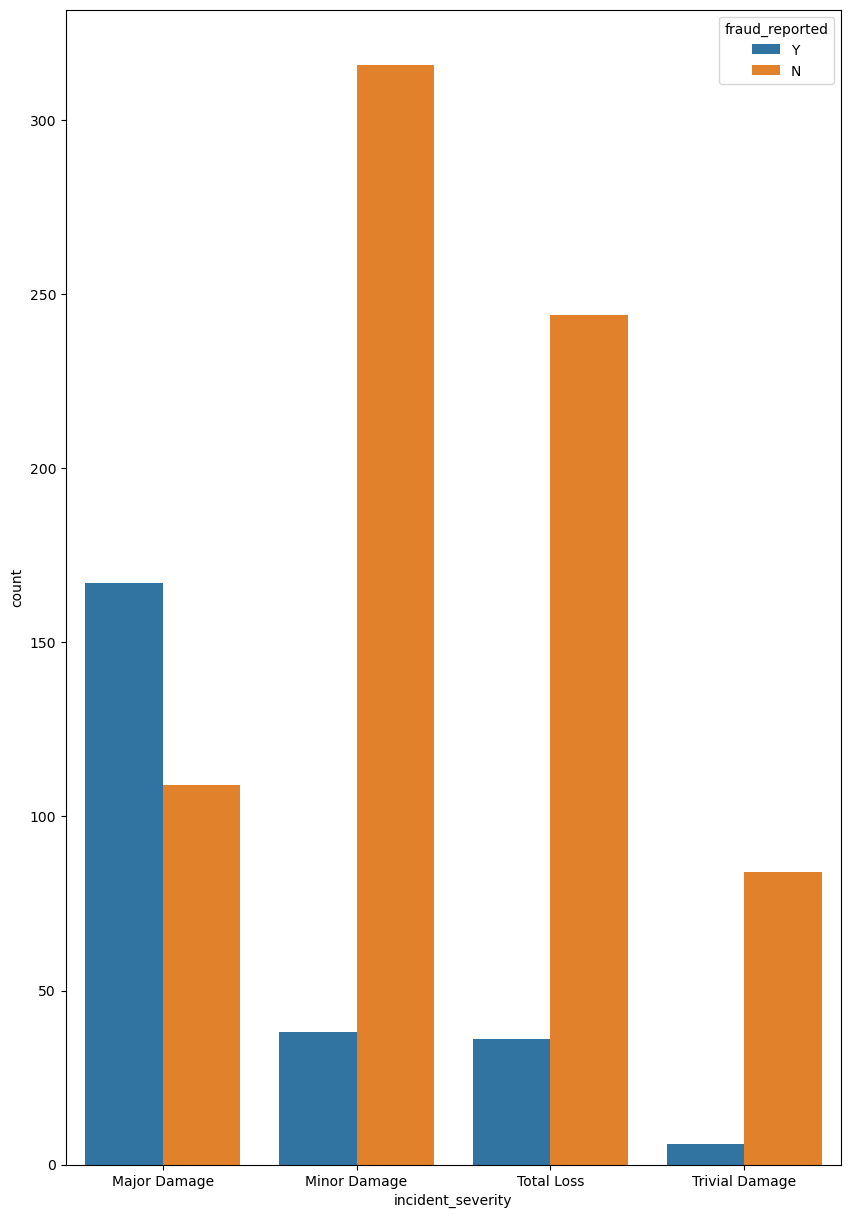

In [36]:
print('............................Reported frauds vs Severity of incident...........................')

plt.figure(figsize=(10,15))
sns.countplot(x=df['incident_severity'], hue=df['fraud_reported'])
plt.show()

## observations:
Majority frauds were reported for Major damage as per the severity of incident.

# Now we use label encoder for and convert the categorical_columns to numericals columns:

In [37]:
le = LabelEncoder()

In [38]:
i = df.select_dtypes(include='object')
i

,policy_bind_date,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_date,incident_type,...,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,property_damage,police_report_available,auto_make,auto_model,fraud_reported
0,17-10-2014,OH,250/500,MALE,MD,craft-repair,sleeping,husband,25-01-2015,Single Vehicle Collision,...,Major Damage,Police,SC,Columbus,9935 4th Drive,YES,YES,Saab,92x,Y
1,27-06-2006,IN,250/500,MALE,MD,machine-op-inspct,reading,other-relative,21-01-2015,Vehicle Theft,...,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,NO,NO,Mercedes,E400,Y
2,06-09-2000,OH,100/300,FEMALE,PhD,sales,board-games,own-child,22-02-2015,Multi-vehicle Collision,...,Minor Damage,Police,NY,Columbus,7121 Francis Lane,NO,NO,Dodge,RAM,N
3,25-05-1990,IL,250/500,FEMALE,PhD,armed-forces,board-games,unmarried,10-01-2015,Single Vehicle Collision,...,Major Damage,Police,OH,Arlington,6956 Maple Drive,NO,NO,Chevrolet,Tahoe,Y
4,06-06-2014,IL,500/1000,MALE,Associate,sales,board-games,unmarried,17-02-2015,Vehicle Theft,...,Minor Damage,None,NY,Arlington,3041 3rd Ave,NO,NO,Accura,RSX,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,16-07-1991,OH,500/1000,FEMALE,Masters,craft-repair,paintball,unmarried,22-02-2015,Single Vehicle Collision,...,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,YES,NO,Honda,Accord,N
996,05-01-2014,IL,100/300,FEMALE,PhD,prof-specialty,sleeping,wife,24-01-2015,Single Vehicle Collision,...,Major Damage,Fire,SC,Northbend,3092 Texas Drive,YES,NO,Volkswagen,Passat,N
997,17-02-2003,OH,250/500,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,23-01-2015,Multi-vehicle Collision,...,Minor Damage,Police,NC,Arlington,7629 5th St,NO,YES,Suburu,Impreza,N
998,18-11-2011,IL,500/1000,MALE,Associate,handlers-cleaners,base-jumping,wife,26-02-2015,Single Vehicle Collision,...,Major Damage,Other,NY,Arlington,6128 Elm Lane,NO,YES,Audi,A5,N


In [39]:
print('................Here are the result after converting the object to numerical..........')
for i in df.columns:
    df[i] = le.fit_transform(df[i].values.reshape(-1,1))

................Here are the result after converting the object to numerical..........


In [40]:
df.head()

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,299,29,532,2,1,1,732,1,1,4,...,2,1,563,258,512,545,10,1,9,1
1,212,23,821,1,1,2,396,5,1,4,...,0,0,44,46,45,38,8,12,12,1
2,123,10,186,2,0,2,740,5,0,6,...,3,0,143,337,104,116,4,30,12,0
3,239,22,766,0,1,2,743,6,0,6,...,2,0,451,245,249,521,3,34,19,1
4,212,25,181,0,2,1,902,6,1,0,...,1,0,81,70,36,66,0,31,14,0


# Now we correlation among the dataset:

In [41]:
df.corr()

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
months_as_customer,1.000000,0.911296,0.053206,-0.000783,-0.026295,0.016873,0.014294,0.017145,0.059153,0.000265,...,0.057284,-0.020217,0.055934,0.064041,0.029788,0.052742,0.044443,0.001095,0.002020,0.017095
age,0.911296,1.000000,0.056538,-0.014533,-0.015185,0.020561,0.017822,0.021924,0.073337,0.000969,...,0.052359,-0.020441,0.071265,0.075124,0.060450,0.059784,0.030410,0.017343,0.001354,0.012143
policy_bind_date,0.053206,0.056538,1.000000,0.015289,0.008486,-0.016906,-0.032003,-0.024888,0.039338,0.040606,...,-0.007004,-0.011563,0.009868,0.026021,0.016972,0.009028,-0.025955,0.000306,0.035067,0.060642
policy_state,-0.000783,-0.014533,0.015289,1.000000,0.001027,0.008213,0.014751,-0.031793,-0.020481,-0.034327,...,0.022960,0.069017,-0.015990,-0.042685,0.009282,-0.007492,0.017124,-0.025253,0.002114,0.029432
policy_csl,-0.026295,-0.015185,0.008486,0.001027,1.000000,0.001986,0.017161,0.022779,-0.010757,0.009153,...,0.071500,-0.001645,-0.043541,-0.076419,-0.041428,-0.027320,-0.004701,0.047885,-0.033082,-0.037190
policy_deductable,0.016873,0.020561,-0.016906,0.008213,0.001986,1.000000,0.003182,0.009402,-0.011948,0.012000,...,0.074994,0.040129,0.020877,0.028482,0.058976,0.004261,-0.030775,-0.003892,0.024921,0.007620
policy_annual_premium,0.014294,0.017822,-0.032003,0.014751,0.017161,0.003182,1.000000,-0.003712,0.034839,-0.016601,...,0.012004,0.016026,-0.001025,-0.021839,-0.006593,0.009413,0.007216,-0.030185,-0.031015,-0.015261
umbrella_limit,0.017145,0.021924,-0.024888,-0.031793,0.022779,0.009402,-0.003712,1.000000,0.009733,-0.019668,...,-0.005779,-0.042278,-0.036495,-0.048003,-0.018668,-0.031991,-0.007169,0.042421,0.010528,0.057719
insured_sex,0.059153,0.073337,0.039338,-0.020481,-0.010757,-0.011948,0.034839,0.009733,1.000000,0.009002,...,0.042463,0.006992,-0.021761,0.001792,-0.009003,-0.031984,0.026457,-0.018421,-0.028247,0.030873
insured_education_level,0.000265,0.000969,0.040606,-0.034327,0.009153,0.012000,-0.016601,-0.019668,0.009002,1.000000,...,0.019211,0.051640,0.073526,0.079108,0.057098,0.071132,0.055202,0.049445,0.043509,0.008808


# observations:


# Now i will discuss a few observations from your correlation matrix:

## High Positive Correlations:

## months_as_customer and age have a high positive correlation of approximately 0.91. This suggests that as the number of months a customer has been with the company increases, their age tends to increase as well.

## total_claim_amount and vehicle_claim have a high positive correlation of approximately 0.97. This indicates a strong positive relationship between the total claim amount and the amount claimed for the vehicle.

# High Negative Correlations:

## incident_severity and fraud_reported have a relatively high negative correlation of approximately -0.41. This suggests that as the severity of an incident increases, the likelihood of fraud being reported decreases.

# Other Correlations:

#### Some variables have weak correlations or correlations close to zero.

## Correlation with the Target Variable (fraud_reported):

### The correlation of other variables with the target variable fraud_reported indicates the strength and direction of their relationship with the likelihood of fraud being reported.

# Now we will see the graph using the heatmap for the correlation:

------------------------The corelations among data----------------------


<AxesSubplot:>

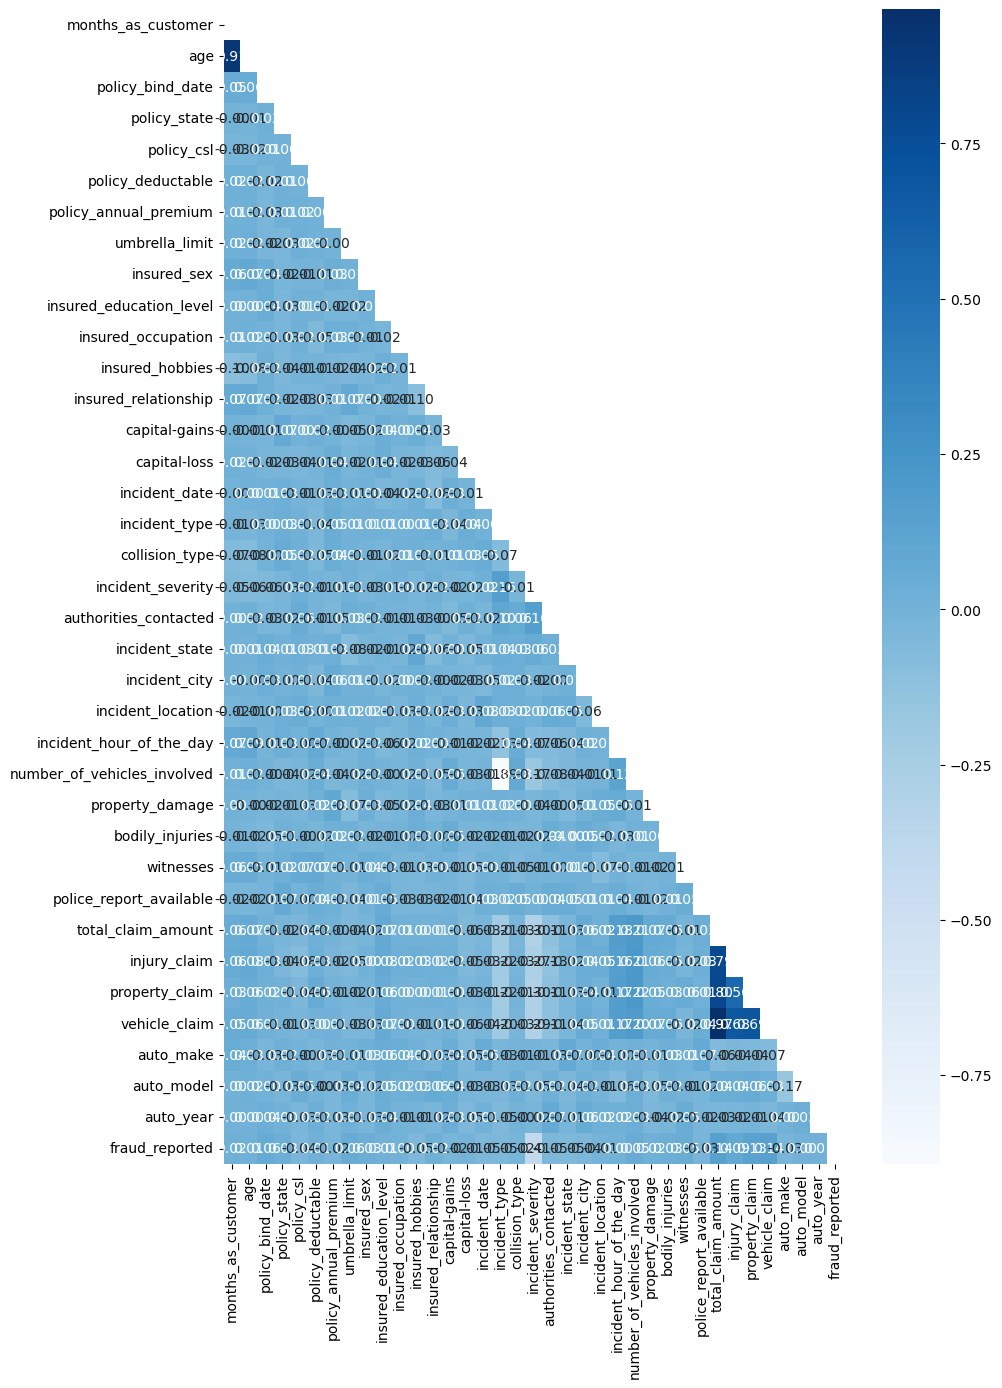

In [42]:
print("------------------------The corelations among data----------------------")

plt.figure(figsize=(10,15))
sns.heatmap(df.corr(),mask=np.triu(df.corr()),annot = True, fmt = '0.2f',cmap='Blues')

vehicle_claim                  0.144769
total_claim_amount             0.140553
property_claim                 0.133952
injury_claim                   0.086889
policy_bind_date               0.060642
umbrella_limit                 0.057719
number_of_vehicles_involved    0.051839
witnesses                      0.049497
bodily_injuries                0.033877
insured_sex                    0.030873
policy_state                   0.029432
insured_relationship           0.021043
property_damage                0.017202
months_as_customer             0.017095
age                            0.012143
insured_education_level        0.008808
auto_year                      0.007928
policy_deductable              0.007620
incident_hour_of_the_day       0.004316
insured_occupation             0.001564
auto_model                     0.000720
capital-loss                  -0.007930
incident_location             -0.008832
policy_annual_premium         -0.015261
collision_type                -0.017315


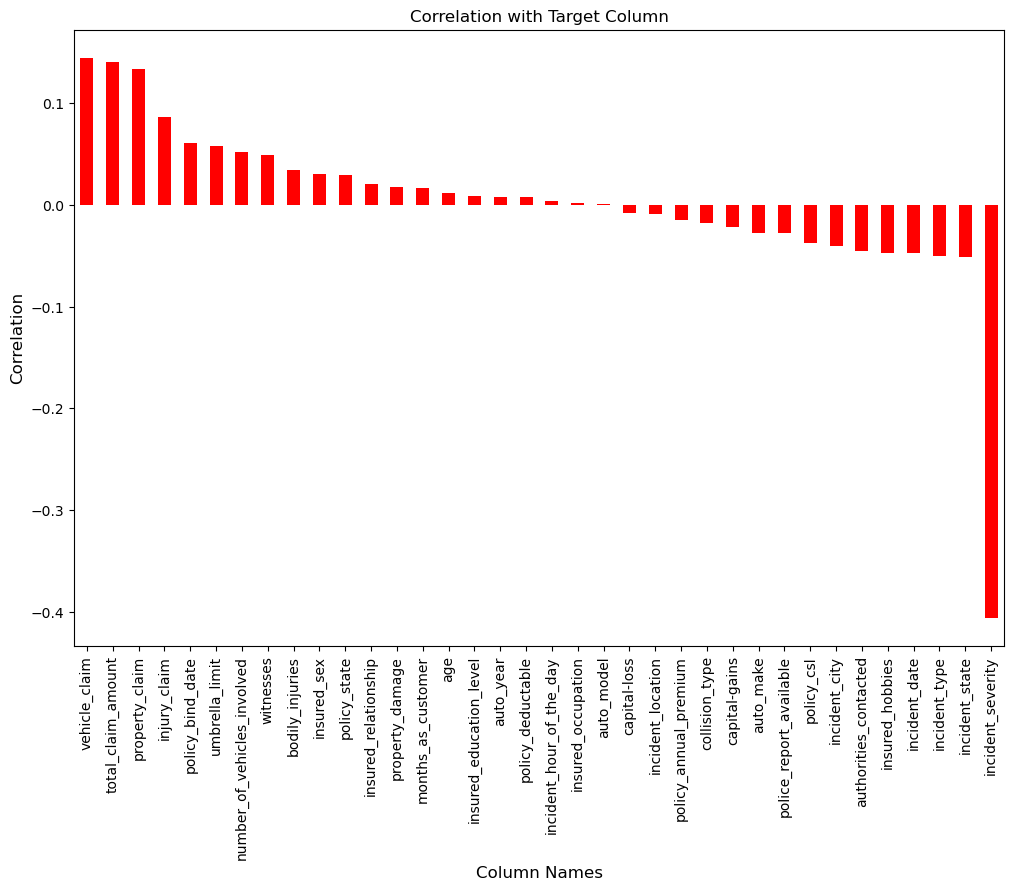

In [43]:
print(df.corr()['fraud_reported'].drop('fraud_reported').sort_values(ascending = False))
plt.figure(figsize = [12,8])
df.corr()['fraud_reported'].sort_values(ascending= False).drop('fraud_reported').plot(kind = 'bar', color ='r')
plt.xlabel('Column Names', fontsize = 12)
plt.ylabel('Correlation', fontsize = 12)
plt.title('Correlation with Target Column')
plt.show()

# Now we will see the skewness in the dataset:

In [44]:
print('Here we will see the data skew from highest to lowest------  ')
df.skew().sort_values(ascending = False)

Here we will see the data skew from highest to lowest------  


umbrella_limit                 1.936066
fraud_reported                 1.175051
capital-gains                  0.894996
property_damage                0.863806
police_report_available        0.802728
number_of_vehicles_involved    0.502664
age                            0.478988
incident_severity              0.279016
insured_sex                    0.148630
injury_claim                   0.105325
incident_type                  0.101507
months_as_customer             0.092231
policy_csl                     0.088928
insured_relationship           0.077488
property_claim                 0.071055
policy_deductable              0.063505
incident_city                  0.049531
witnesses                      0.019636
bodily_injuries                0.014777
vehicle_claim                  0.014526
policy_bind_date               0.005194
incident_date                  0.004756
total_claim_amount             0.003492
incident_location              0.000000
insured_education_level       -0.000148


 thus i will not use power transform:

# Now using the graph we will see the relation:

Here we will use the distplot for view the relations-------------


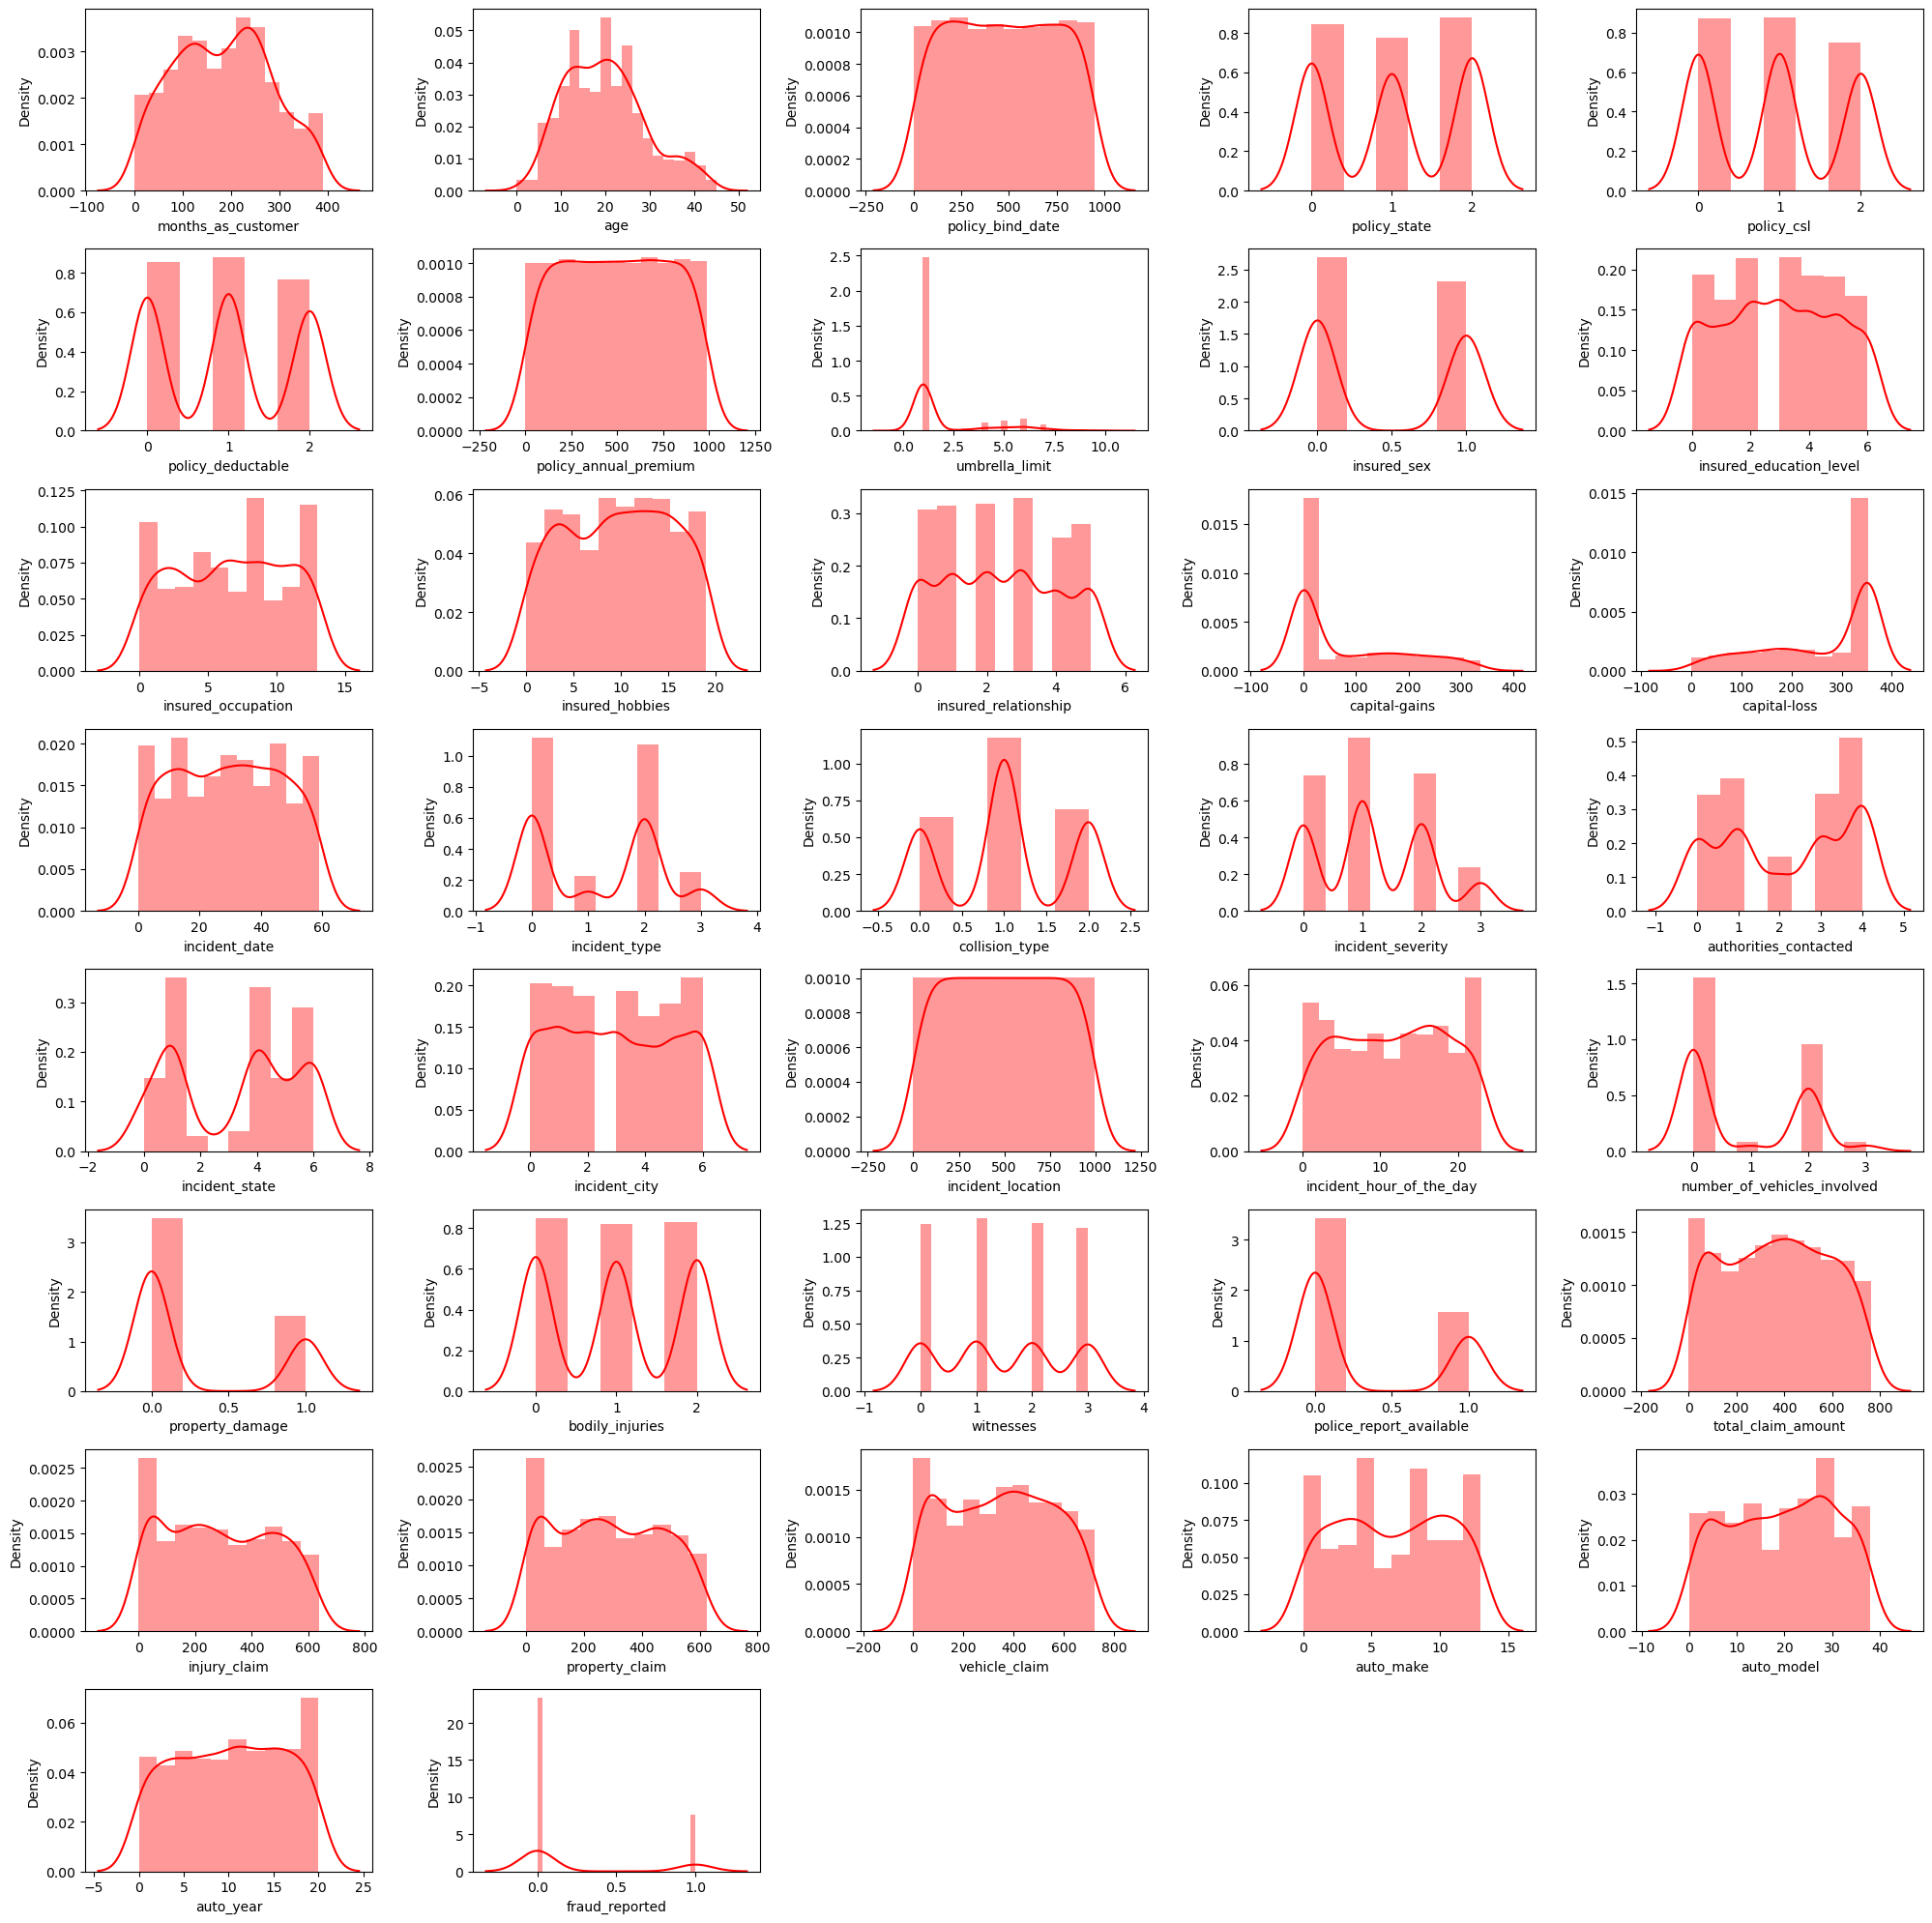

In [45]:
print('Here we will use the distplot for view the relations-------------')
plt.figure(figsize=(20,20))
plot=1
for col in df.columns:
    if plot<=40:
        plt.subplot(8,5,plot)
        sns.distplot(df[col],color='red')
        plt.xlabel(col)
        plot=plot+1
plt.tight_layout()

# Now we will see for the outliers present in the dataset:

In [46]:
print('Here i will store all the numerical_columns from the main dataset using the boxplot for detection of outliers------')
numerical_columns = df.select_dtypes(include = 'int').columns
numerical_columns

Here i will store all the numerical_columns from the main dataset using the boxplot for detection of outliers------


Index(['months_as_customer', 'age', 'policy_bind_date', 'policy_state',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year', 'fraud_reported'],
      dtype='object')

Here are the boxplot for detections of outliers-------


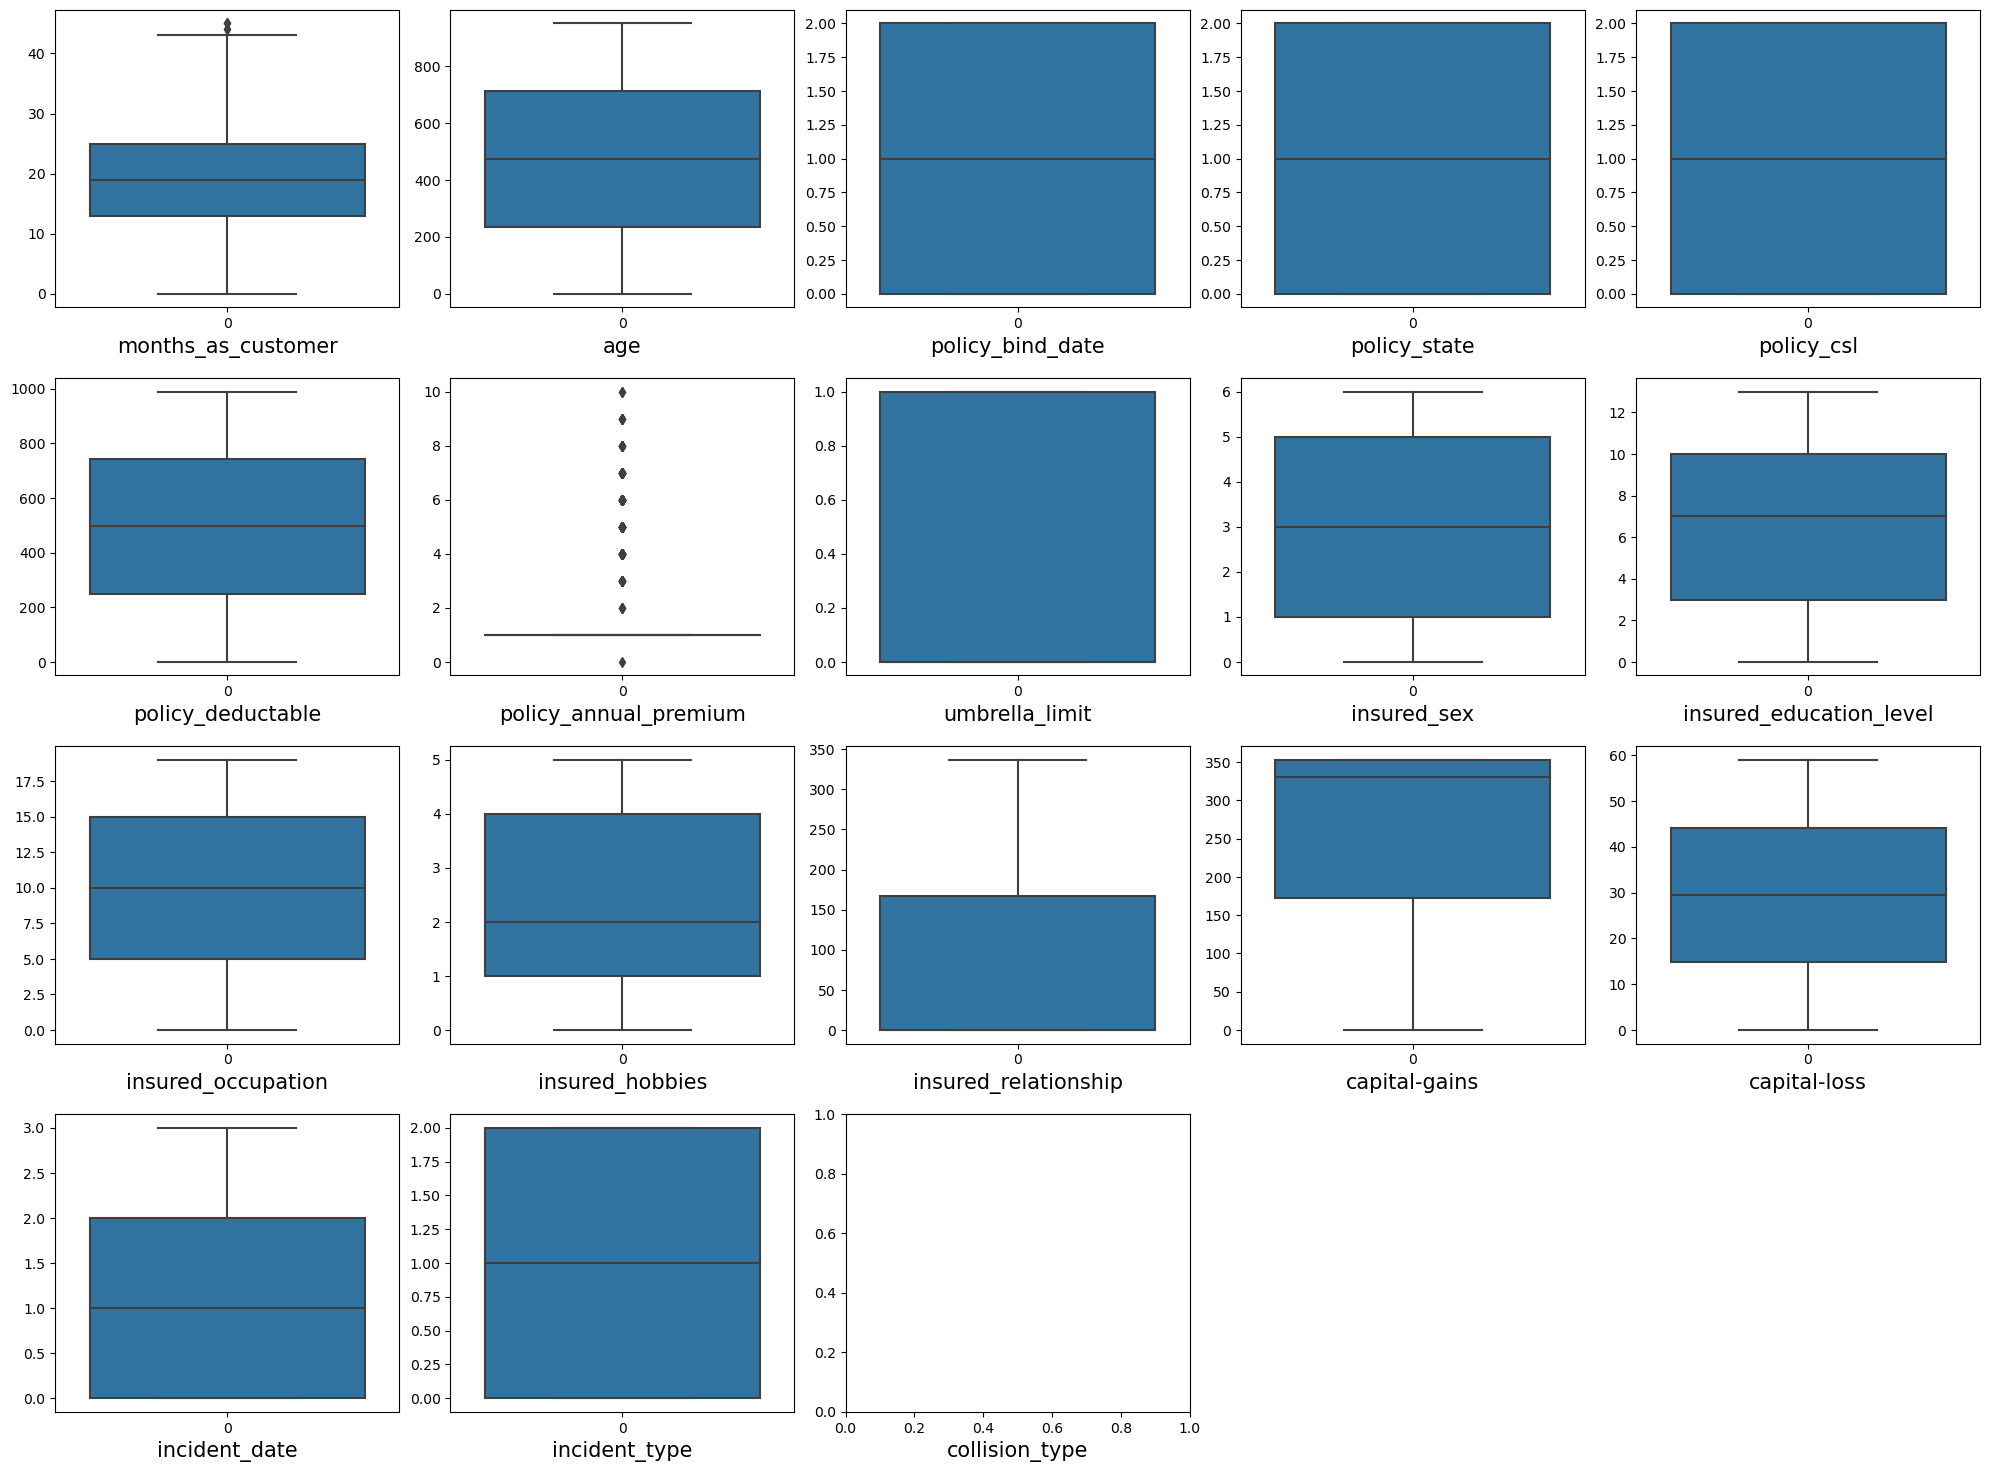

In [47]:
print('Here are the boxplot for detections of outliers-------')
plt.figure(figsize=(20,18))
plot = 1

for i in numerical_columns:
    if plot<=18:
        sns.boxplot(data=df[i],orient='pink')
        ax = plt.subplot(5,5,plot)
        plt.xlabel(i,fontsize=15) 
    plot+=1 
plt.tight_layout()
plt.show()

# observation:
we can see outliers in the months_as_customer and policy_annual_premium

# Splitting the data into 'x' and 'y' labels:

In [48]:
x=df.drop('fraud_reported',axis=1)
y=df['fraud_reported']


In [49]:
x

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
0,299,29,532,2,1,1,732,1,1,4,...,1,2,1,563,258,512,545,10,1,9
1,212,23,821,1,1,2,396,5,1,4,...,0,0,0,44,46,45,38,8,12,12
2,123,10,186,2,0,2,740,5,0,6,...,2,3,0,143,337,104,116,4,30,12
3,239,22,766,0,1,2,743,6,0,6,...,1,2,0,451,245,249,521,3,34,19
4,212,25,181,0,2,1,902,6,1,0,...,0,1,0,81,70,36,66,0,31,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,19,487,2,2,1,577,1,0,5,...,0,1,0,705,624,379,664,6,6,11
996,266,22,129,0,0,1,765,1,0,6,...,2,3,0,760,630,608,714,13,28,20
997,119,15,509,2,1,0,691,3,0,5,...,2,3,1,507,324,330,554,11,19,1
998,377,43,573,0,2,2,652,5,1,0,...,0,1,1,224,168,170,256,1,5,3


In [50]:
y

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported, Length: 1000, dtype: int32

In [51]:
sm = SMOTE()
x,y=sm.fit_resample(x,y)
y

0       1
1       1
2       0
3       1
4       0
       ..
1501    1
1502    1
1503    1
1504    1
1505    1
Name: fraud_reported, Length: 1506, dtype: int32

1    753
0    753
Name: fraud_reported, dtype: int64


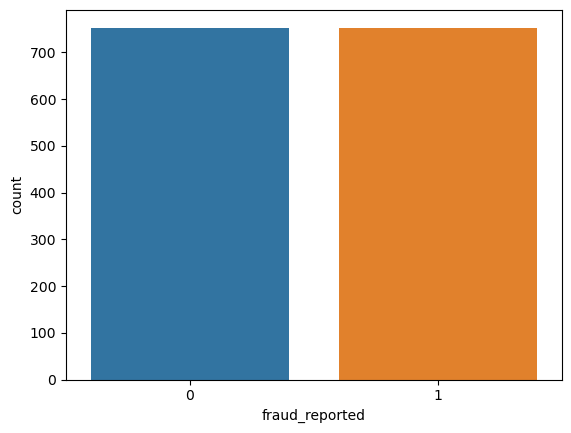

In [52]:
sns.countplot(x=y)
print(y.value_counts())

# Now we will remove the outliers:

In [53]:
z = np.abs(zscore(x))
z

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
0,1.198082,1.058703,0.185483,1.368436,0.208981,0.206779,0.848942,0.517553,1.263547,0.640533,...,0.139775,0.555252,1.837908,0.851263,0.213968,1.203076,0.897377,0.977409,1.707590,0.166916
1,0.289514,0.374897,1.244188,0.103326,0.208981,1.509745,0.342028,1.687354,1.263547,0.640533,...,1.113206,1.340915,0.544097,1.635568,1.381688,1.473038,1.623353,0.451515,0.669348,0.363038
2,0.639940,1.106681,1.082033,1.368436,1.086184,1.509745,0.877299,1.687354,0.791423,1.737966,...,1.392756,1.503336,0.544097,1.161201,0.221173,1.134942,1.235548,0.600274,1.029593,0.363038
3,0.571483,0.260930,1.042705,1.161784,0.208981,1.509745,0.887932,2.238580,0.791423,1.737966,...,0.139775,0.555252,0.544097,0.314606,0.285573,0.304029,0.778052,0.863221,1.407135,1.599598
4,0.289514,0.602832,1.100350,1.161784,1.504145,0.206779,1.451516,2.238580,1.263547,1.554332,...,1.113206,0.392832,0.544097,1.458279,1.249493,1.524612,1.484141,1.652063,1.123978,0.716341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,0.504177,0.650811,0.704709,0.103326,1.086184,1.096188,0.455496,1.687354,1.263547,0.456899,...,0.139775,1.340915,0.544097,0.389757,0.760968,0.728081,0.489770,0.451515,1.235662,1.756778
1502,1.292071,1.286638,1.547278,0.103326,0.208981,0.206779,0.951734,0.517553,1.263547,0.456899,...,0.139775,1.503336,0.544097,1.060578,1.089758,0.006046,1.081421,1.652063,0.840821,1.580126
1503,0.853452,1.058703,0.184515,1.161784,1.086184,1.096188,1.479873,0.033674,0.791423,0.456899,...,0.139775,1.503336,0.544097,1.062093,1.482531,0.108562,0.991842,0.337327,0.274508,0.343567
1504,0.561040,0.374897,1.246884,1.161784,1.504145,0.206779,1.100563,0.517553,0.791423,1.554332,...,1.113206,1.340915,0.544097,1.137243,0.081773,1.163595,1.180858,1.389116,1.424433,0.186387


In [54]:
thershold = 3

In [55]:
df1=x[(z<3).all(axis = 1)]
df1

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
0,299,29,532,2,1,1,732,1,1,4,...,1,2,1,563,258,512,545,10,1,9
1,212,23,821,1,1,2,396,5,1,4,...,0,0,0,44,46,45,38,8,12,12
2,123,10,186,2,0,2,740,5,0,6,...,2,3,0,143,337,104,116,4,30,12
3,239,22,766,0,1,2,743,6,0,6,...,1,2,0,451,245,249,521,3,34,19
4,212,25,181,0,2,1,902,6,1,0,...,0,1,0,81,70,36,66,0,31,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,136,14,289,1,0,0,621,5,1,2,...,1,0,0,304,435,175,266,8,6,0
1502,308,31,59,1,1,1,761,1,1,2,...,1,3,0,164,99,301,147,0,28,1
1503,266,29,431,0,0,0,910,2,0,2,...,1,3,0,607,566,321,564,5,22,8
1504,238,23,141,0,2,1,182,1,0,0,...,0,0,0,148,282,99,127,1,4,11


In [56]:
df1['fraud_reported'] = y

In [57]:
print ("Percentage of data loss ", (x.shape[0]-df1.shape[0])/x.shape[0]*100)

Percentage of data loss  1.1952191235059761


In [58]:
x = df1.drop('fraud_reported',axis = 1)
x

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
0,299,29,532,2,1,1,732,1,1,4,...,1,2,1,563,258,512,545,10,1,9
1,212,23,821,1,1,2,396,5,1,4,...,0,0,0,44,46,45,38,8,12,12
2,123,10,186,2,0,2,740,5,0,6,...,2,3,0,143,337,104,116,4,30,12
3,239,22,766,0,1,2,743,6,0,6,...,1,2,0,451,245,249,521,3,34,19
4,212,25,181,0,2,1,902,6,1,0,...,0,1,0,81,70,36,66,0,31,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,136,14,289,1,0,0,621,5,1,2,...,1,0,0,304,435,175,266,8,6,0
1502,308,31,59,1,1,1,761,1,1,2,...,1,3,0,164,99,301,147,0,28,1
1503,266,29,431,0,0,0,910,2,0,2,...,1,3,0,607,566,321,564,5,22,8
1504,238,23,141,0,2,1,182,1,0,0,...,0,0,0,148,282,99,127,1,4,11


In [59]:
y = df1['fraud_reported']
y

0       1
1       1
2       0
3       1
4       0
       ..
1501    1
1502    1
1503    1
1504    1
1505    1
Name: fraud_reported, Length: 1488, dtype: int32

In [60]:
z = x.columns
z

Index(['months_as_customer', 'age', 'policy_bind_date', 'policy_state',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year'],
      dtype='object')

In [61]:
print("here we will see the rows and columns after removing the ouliers --------")
print(x.shape)
print(y.shape)

here we will see the rows and columns after removing the ouliers --------
(1488, 36)
(1488,)


# Scaling the data using standardscaler:

In [62]:
sc = StandardScaler()

x = sc.fit_transform(x)


In [63]:
sc = StandardScaler()

In [64]:
scaled = sc.fit_transform(x)
scaled

array([[ 1.19593207,  1.05708445,  0.18230322, ...,  0.97395603,
        -1.70188806, -0.17181588],
       [ 0.28920171,  0.37551805,  1.23926913, ...,  0.44676557,
        -0.66304772,  0.3582367 ],
       [-0.63837302, -1.10120916, -1.08313001, ..., -0.60761535,
         1.03687284,  0.3582367 ],
       ...,
       [ 0.85199986,  1.05708445, -0.18708625, ..., -0.34402012,
         0.28135259, -0.34850008],
       [ 0.5601786 ,  0.37551805, -1.24770948, ..., -1.39840104,
        -1.41856796,  0.18155251],
       [-0.53415114, -0.76042596,  0.4675743 , ..., -0.34402012,
         0.94243281, -0.70186847]])

# [Train_test_split]:

In [67]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# [ Model Selection ]:

In [81]:
print('Here i will initialize severals models....................')
models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Classifier': SVC(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
    'Random Forest Classifier': RandomForestClassifier(),
    'AdaBoost Classifier': AdaBoostClassifier(),
    'Extra Trees Classifier': ExtraTreesClassifier(),
    'XGBoost Classifier': XGBClassifier()}
models

Here i will initialize severals models....................


{'Logistic Regression': LogisticRegression(),
 'K-Nearest Neighbors': KNeighborsClassifier(),
 'Support Vector Classifier': SVC(),
 'Gradient Boosting Classifier': GradientBoostingClassifier(),
 'Decision Tree Classifier': DecisionTreeClassifier(),
 'Naive Bayes': GaussianNB(),
 'Random Forest Classifier': RandomForestClassifier(),
 'AdaBoost Classifier': AdaBoostClassifier(),
 'Extra Trees Classifier': ExtraTreesClassifier(),
 'XGBoost Classifier': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_

In [82]:
print(' Train and evaluate each model...............')
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} - Accuracy: {accuracy}")

 Train and evaluate each model...............
Logistic Regression - Accuracy: 0.825503355704698
K-Nearest Neighbors - Accuracy: 0.6778523489932886
Support Vector Classifier - Accuracy: 0.8691275167785235
Gradient Boosting Classifier - Accuracy: 0.8926174496644296
Decision Tree Classifier - Accuracy: 0.8422818791946308
Naive Bayes - Accuracy: 0.8187919463087249
Random Forest Classifier - Accuracy: 0.8859060402684564
AdaBoost Classifier - Accuracy: 0.8791946308724832
Extra Trees Classifier - Accuracy: 0.8959731543624161
XGBoost Classifier - Accuracy: 0.8993288590604027


# [Model Evaluation]:

In [86]:
from xgboost import XGBClassifier

In [90]:
print('selecting the best-performing model for further analysis.............')
final_model = XGBClassifier()
final_model

selecting the best-performing model for further analysis.............


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [100]:
print('Fit (train) the model')
final_model.fit(X_train, y_train)

Fit (train) the model


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [101]:
print('The result of Cross-validation.......')
cv_scores = cross_val_score(final_model, x, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

The result of Cross-validation.......
Cross-Validation Scores: [0.78187919 0.86912752 0.90939597 0.91245791 0.91582492]
Mean CV Score: 0.8777371025693175


In [102]:
print(' The Confusion Matrix and Classification Report are .........................')
y_pred = final_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


 The Confusion Matrix and Classification Report are .........................
Confusion Matrix:
 [[128  20]
 [ 10 140]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.86      0.90       148
           1       0.88      0.93      0.90       150

    accuracy                           0.90       298
   macro avg       0.90      0.90      0.90       298
weighted avg       0.90      0.90      0.90       298



The ROC Curve and AUC Score is................


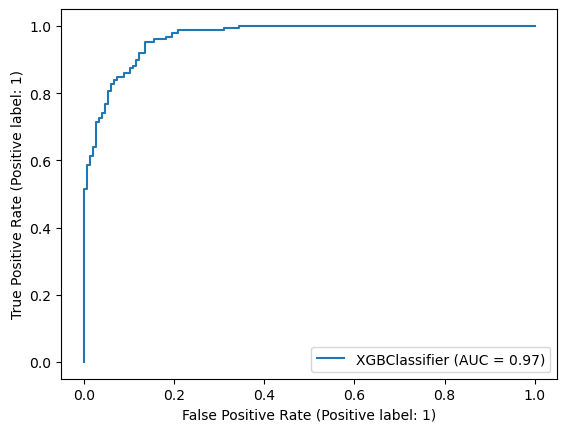

ROC AUC Score: 0.8990990990990991


In [104]:
print('The ROC Curve and AUC Score is................')
plot_roc_curve(final_model, X_test, y_test)
plt.show()

roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC Score:", roc_auc)

# [Hyperparameter Tuning]:

In [105]:
print("Here are the parameters for hypertunning.........")
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]}
param_grid

Here are the parameters for hypertunning.........


{'n_estimators': [50, 100, 200],
 'max_depth': [None, 10, 20],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4]}

In [106]:
grid_search = GridSearchCV(XGBClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=N

In [107]:
best_params = grid_search.best_params_
print(f'Best Hyperparameters for Random Forest: {best_params}')

Best Hyperparameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [108]:
print("Here i will store the original data............")
original = np.array(y_test)
original

Here i will store the original data............


array([1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1])

In [111]:
print("Here i will store the predicted data.......................")
predicted = np.round(np.array(final_model.predict(X_test)),0)
predicted

Here i will store the predicted data.......................


array([1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1])

## Now i will create the new dataframe to store the claim and claim_predict result:

In [112]:
tom_prediction = pd.DataFrame({'Claim (Original)':original,'Claim(Predicted)':predicted})
tom_prediction.sample(10)

,Claim (Original),Claim(Predicted)
278,1,1
155,0,0
296,1,1
204,1,1
42,0,0
102,1,1
30,0,1
91,1,1
21,1,1
197,0,0


In [113]:
import pickle

filename = 'Insurance claim model .pkl'
pickle.dump(final_model,open(filename,'wb'))

In [114]:
########################################################Thank You################################################################